# Steps in Data Preprocessing

#### Step 1: Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import minmax_scale
%reload_ext autoreload
%autoreload

#### Step 2: Load the dataset

In [4]:
df = pd.read_csv('diabetes.csv')
df.index +=1
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Check the duplicate rows.
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Example
# From the above data info,
# we can see that column-1 and Column-2 have an unequal number of counts. 
# And some of the columns are categorical and have data type objects and some are integer and float values.

In [6]:
# the percentage of missing values 
round((df.isnull().sum()/df.shape[0])*100,2)
# percentage % of null values is more in col(60%-90%) So, it’s not a good idea 
# to fill 60%-90% of null values.So, we will drop that column 

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

There is no Null values in the dataset.

We can also check the null values using df.isnull()

#### Step 3: Statistical Analysis
In statistical analysis, first, we use the df.describe() which will give a descriptive overview of the dataset.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Check the Categorical and Numerical Columns

In [8]:
# Categorical columns
Cat_col = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns ",Cat_col)
# Numerical columns
Num_col = [col for col in df.columns if df[col].dtype != 'object']
print("Numerical columns ",Num_col)

Categorical columns  []
Numerical columns  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [9]:
# Check the total number of unique values in the Categorical columns
# in this data set nunique is no need 
# df[Cat_col].nunique()
# df[Num_col].nuniqueique()
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Now we have to make a decision according to the subject of analysis, which factor is important for our discussion. As we know our machines don’t understand the text data. So, we have to either drop or convert the categorical column values into numerical types.


In [10]:
# drop unwanted columns

if we find miss values then we can fill the missing values by mean,median or mode etc
# Note: 
    1. Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
    2.Median imputation is preferable when the data contains outliers or is skewed.

# Handling outliers:

Let’s plot the boxplot for each column for easy understanding

#### Step 4: Check the outliers:

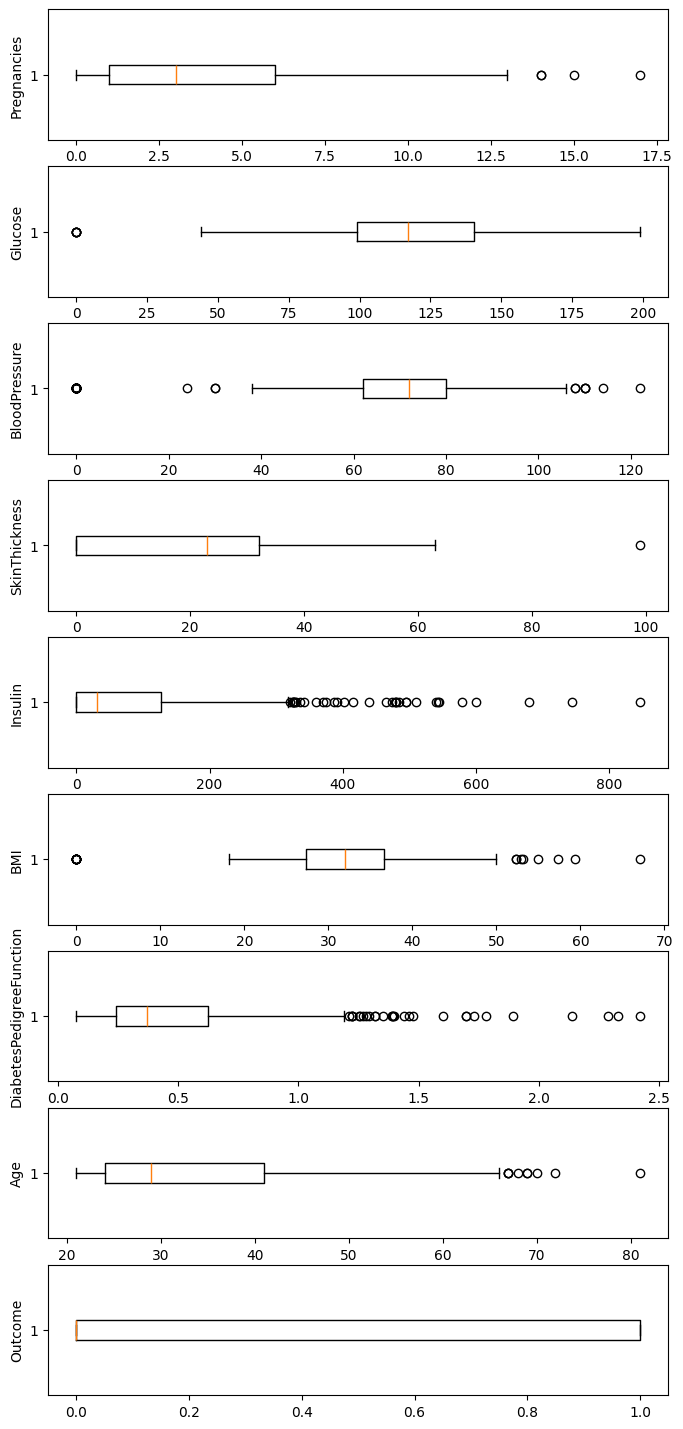

In [11]:
fig,axs = plt.subplots(9,1,figsize = (8,18),dpi=100)
i=0
for col in df.columns:
    axs[i].boxplot(df[col],vert = False)
    axs[i].set_ylabel(col)
    i+=1

from the above boxplot, we can clearly see that all most every column has some amounts of outliers. 

### Drop all outliers

In [12]:
# Identify the quartiles
q1,q3 = np.percentile(df['Pregnancies'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df[(df['Pregnancies'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

q1 value:-  1.0
q3 value:-  6.0
interquartile range:-  5.0
lower_bound =  -6.5
upper_bound =  13.5


In [13]:
# Identify the quartiles
q1,q3 = np.percentile(df['Insulin'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df_c[(df_c['Insulin'] >= lower_bound) & (df_c['Insulin'] <= upper_bound)]

q1 value:-  0.0
q3 value:-  127.25
interquartile range:-  127.25
lower_bound =  -190.875
upper_bound =  318.125


In [14]:
# Identify the quartiles
q1,q3 = np.percentile(df['Glucose'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df_c[(df_c['Glucose'] >= lower_bound) & (df_c['Glucose'] <= upper_bound)]

q1 value:-  99.0
q3 value:-  140.25
interquartile range:-  41.25
lower_bound =  37.125
upper_bound =  202.125


In [15]:
# Identify the quartiles
q1,q3 = np.percentile(df['BloodPressure'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (.75 * iqr)
upper_bound = q3 + (.75 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df_c[(df_c['BloodPressure'] >= lower_bound) & (df_c['BloodPressure'] <= upper_bound)]

q1 value:-  62.0
q3 value:-  80.0
interquartile range:-  18.0
lower_bound =  48.5
upper_bound =  93.5


In [16]:
# Identify the quartiles
q1,q3 = np.percentile(df['SkinThickness'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df_c[(df_c['SkinThickness'] >= lower_bound) & (df_c['SkinThickness'] <= upper_bound)]

q1 value:-  0.0
q3 value:-  32.0
interquartile range:-  32.0
lower_bound =  -48.0
upper_bound =  80.0


In [17]:
# Identify the quartiles
q1,q3 = np.percentile(df['BMI'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (.8 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df_c[(df_c['BMI'] >= lower_bound) & (df_c['BMI'] <= upper_bound)]

q1 value:-  27.3
q3 value:-  36.6
interquartile range:-  9.3
lower_bound =  13.35
upper_bound =  44.040000000000006


In [18]:
# Identify the quartiles
q1,q3 = np.percentile(df['DiabetesPedigreeFunction'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.9 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df_c[(df_c['DiabetesPedigreeFunction'] >= lower_bound) & (df_c['DiabetesPedigreeFunction'] <= upper_bound)]

q1 value:-  0.24375
q3 value:-  0.62625
interquartile range:-  0.38249999999999995
lower_bound =  -0.32999999999999996
upper_bound =  1.3529999999999998


In [19]:
# Identify the quartiles
q1,q3 = np.percentile(df['Age'],[25,75])
print('q1 value:- ',q1)
print('q3 value:- ',q3)
# Calculate the interquartile range
iqr = q3 -q1
print('interquartile range:- ',iqr)
# Calculate the interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# drop the outliers
df_c = df_c[(df_c['Age'] >= lower_bound) & (df_c['Age'] <= upper_bound)]

q1 value:-  24.0
q3 value:-  41.0
interquartile range:-  17.0
lower_bound =  -1.5
upper_bound =  66.5


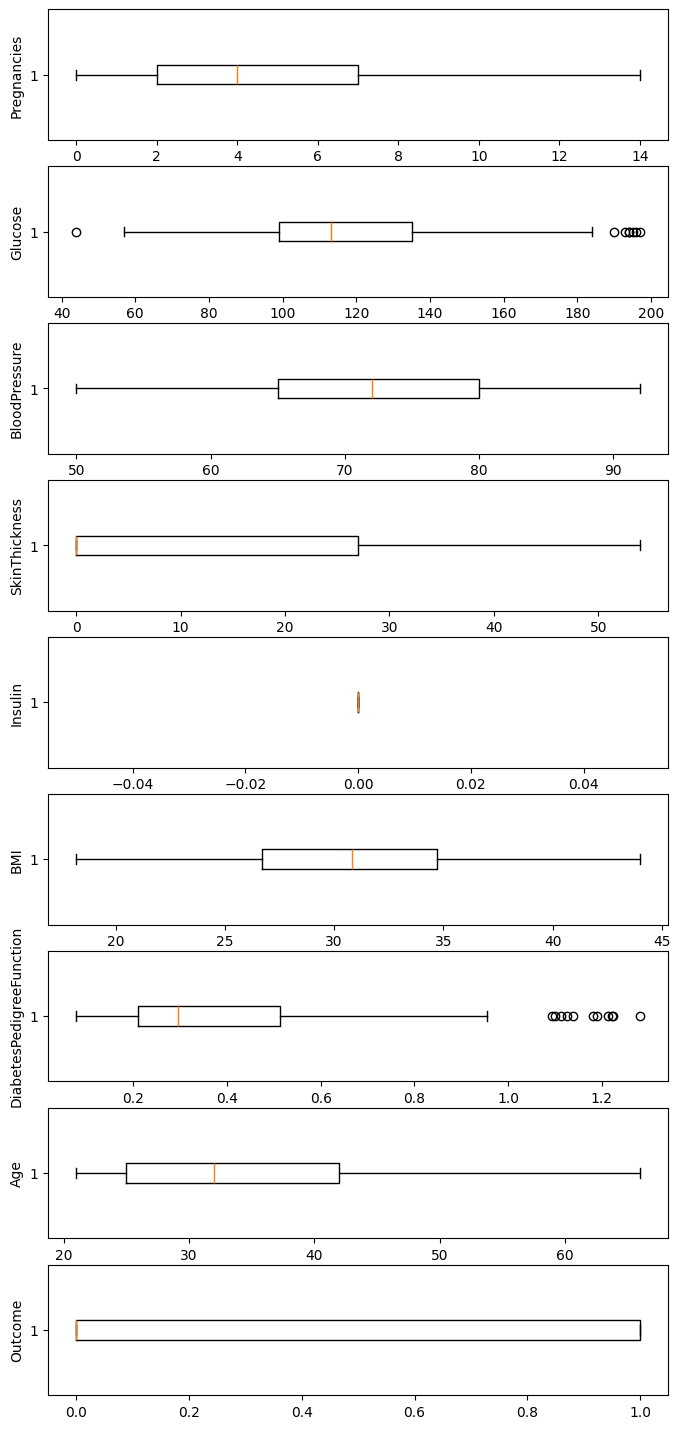

In [20]:
fig,axs = plt.subplots(9,1,figsize = (8,18),dpi=100)
i=0
for col in df.columns:
    axs[i].boxplot(df_c[col],vert = False)
    axs[i].set_ylabel(col)
    i+=1

# or

In [21]:
# calculate summary statistics
mean = df['BMI'].mean()
std  = df['BMI'].std()
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
# Drop the outliers
df_1 = df[(df['BMI'] >= lower_bound)
                & (df['BMI'] <= upper_bound)]

Lower Bound : 16.224257484249115
Upper Bound : 47.76089876575088


{'whiskers': [<matplotlib.lines.Line2D at 0x196b43184d0>,
 'caps': [<matplotlib.lines.Line2D at 0x196b4319650>,
 'boxes': [<matplotlib.lines.Line2D at 0x196b430fc50>],
 'medians': [<matplotlib.lines.Line2D at 0x196b431a810>],
 'fliers': [<matplotlib.lines.Line2D at 0x196b431b050>],
 'means': []}

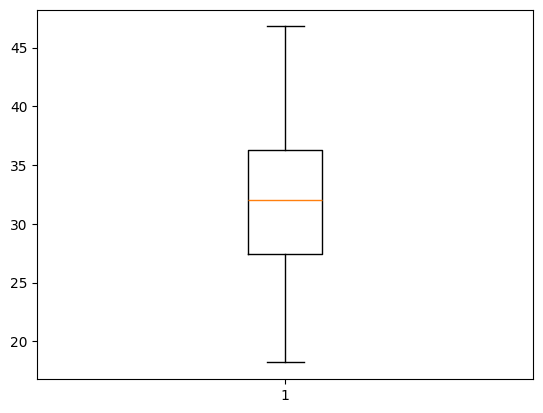

In [22]:
plt.boxplot(df_1['BMI'])

Similarly, we can remove the outliers of the remaining columns.

In [23]:
!jt -t monokai

In [24]:
#!jt -r --reset

Here are the steps to get started with machine learning:

#### 1.Define the Problem: 
    Identify the problem you want to solve and determine if machine learning can be used to solve it.

#### 2.Collect Data:
    Gather and clean the data that you will use to train your model. The quality of your model will depend on the quality of your data.
    
#### 3.Explore the Data: 
    Use data visualization and statistical methods to understand the structure and relationships within your data.
    
#### 4.Pre-process the Data: 
    Prepare the data for modeling by normalizing, transforming, and cleaning it as necessary.
    
#### 4.Split the Data: 
    Divide the data into training and test datasets to validate your model.
    
#### 5.Choose a Model: 
    Select a machine learning model that is appropriate for your problem and the data you have collected.
    
#### 6.Train the Model: 
    Use the training data to train the model, adjusting its parameters to fit the data as accurately as possible.
    
#### 7.Evaluate the Model: 
    Use the test data to evaluate the performance of the model and determine its accuracy.
    
#### 8.Fine-tune the Model: 
    Based on the results of the evaluation, fine-tune the model by adjusting its parameters and repeating the training process until the desired level of accuracy is achieved.
    
#### 9.Deploy the Model: 
    Integrate the model into your application or system, making it available for use by others.
    
#### 10.Monitor the Model:
    Continuously monitor the performance of the model to ensure that it continues to provide accurate results over time.

# Linear Regression Single Variable

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from word2number import w2n
%matplotlib inline
%reload_ext autoreload
%autoreload
import warnings
warnings.simplefilter("ignore")

In [26]:
#!pip install word2number

In [27]:
d = pd.DataFrame({'Area': [2600,3000,3200,3600,4000 ],
                  'Prize': [550000,565000,610000,680000,725000]})
d.index +=1
d

,Area,Prize
1,2600,550000
2,3000,565000
3,3200,610000
4,3600,680000
5,4000,725000


In [28]:
b_1 = d['Prize']
b_1

1    550000
2    565000
3    610000
4    680000
5    725000
Name: Prize, dtype: int64

In [29]:
d = d.drop(['Prize'],axis=1)
d

,Area
1,2600
2,3000
3,3200
4,3600
5,4000


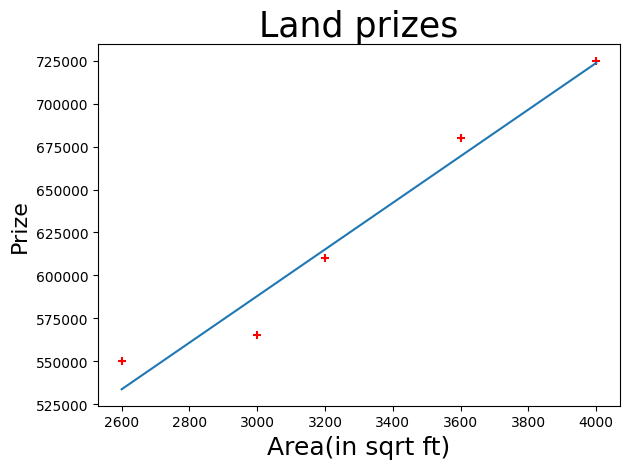

In [30]:
plt.scatter(d.Area,b_1,marker="+",color='r')
plt.xlabel('Area(in sqrt ft)',size=18)
plt.ylabel('Prize',size=16)
plt.title('Land prizes',size=25)
a, b = np.polyfit(d.Area,b_1,1)
plt.plot(d.Area,a*d.Area+b) 
plt.tight_layout()

In [31]:
#from sklearn.linear_model import LinearRegression
reg =LinearRegression()
# fit(independent variables,dependent variables)
reg.fit(d[['Area']].values,b_1.values)

LinearRegression()

In [32]:
new_data = 3000
reg.predict([[new_data]])

array([587979.45205479])

we know that,
       Price = m*area + b 
       
       where,
           m = slope
           b = Y intercept

In [33]:
# reg.coef we get m value
reg.coef_  # m value

array([135.78767123])

In [34]:
# reg.intercept_ we get 
reg.intercept_  # b value

180616.43835616432

In [35]:
prize = 135.78767123*3600+180616.43835616432
prize

669452.0547841643

In [36]:
df = pd.DataFrame({'Area':np.random.randint(1000,10000,10)})
df.values

array([[7232],
       [4369],
       [8237],
       [6453],
       [6259],
       [7062],
       [4038],
       [4752],
       [6694],
       [2812]])

In [37]:
k=reg.predict(df.values)
k

array([1162632.87671233,  773872.7739726 , 1299099.48630137,
       1056854.28082192, 1030511.47260274, 1139548.97260274,
        728927.05479452,  825879.45205479, 1089579.10958904,
        562451.36986301])

In [38]:
df['Price']=k
df.index +=1
df

,Area,Price
1,7232,1.162633e+06
2,4369,7.738728e+05
3,8237,1.299099e+06
4,6453,1.056854e+06
5,6259,1.030511e+06
6,7062,1.139549e+06
7,4038,7.289271e+05
8,4752,8.258795e+05
9,6694,1.089579e+06
10,2812,5.624514e+05


# Linear Regression With Multi-Variables
##    Or
# Mutlivariate Regression

In [39]:
df_1 = pd.DataFrame({'Area':[2500,3000,3200,3600,4000],'BHK':[3,4,np.nan,3,5],'House_Age':[20,15,18,30,8],'Price':[550000,565000,610000,595000,760000,]
})
df_1.index +=1
df_1

,Area,BHK,House_Age,Price
1,2500,3.0,20,550000
2,3000,4.0,15,565000
3,3200,NaN,18,610000
4,3600,3.0,30,595000
5,4000,5.0,8,760000


In [40]:
# mode
df_1.BHK.mode()
# median
import math
NaN = math.floor(df_1.BHK.median())
NaN

3

In [41]:
df_1.BHK.fillna(NaN,inplace=True)
df_1

,Area,BHK,House_Age,Price
1,2500,3.0,20,550000
2,3000,4.0,15,565000
3,3200,3.0,18,610000
4,3600,3.0,30,595000
5,4000,5.0,8,760000


In [42]:
reg_1 = LinearRegression()

In [43]:
# fit(independent variables,dependent variables)
reg_1.fit(df_1[['Area','BHK','House_Age']].values,df_1.Price.values)

LinearRegression()

In [44]:
reg_1.predict([[2500,3,20]]) # area ,bhk ,house_age

array([522822.7571116])

In [45]:
reg_1.coef_  # (m1,m2,m3)

array([   123.5940919 , -20593.81838074,  -6445.56892779])

In [46]:
reg_1.intercept_

404530.3610503279

we know that 
   price = m1*area+m2*BHK+m3*Home_Age+b
    
    where,
         m1= slope of m1
        m2 = slope of m2
        m3 = slope of m3
        b = y intercept
    

In [47]:
price = 123.5940919*2500+-20593.81838074*3+-6445.56892779*20+404530.3610503279
print(round(price,2))

522822.76


In [48]:
import random
random.seed(0)
df_2 = pd.DataFrame({'Area':np.random.randint(2500,9000,10),'BHK':np.random.randint(2,4,10),'House_Age':np.random.randint(2,10,10) })
df_2.index +=1
df_2

,Area,BHK,House_Age
1,5531,3,4
2,2766,3,2
3,4766,3,8
4,7290,3,6
5,4618,2,6
6,6782,3,6
7,3404,2,3
8,7089,3,2
9,7677,3,2
10,3956,3,4


In [49]:
ak = reg_1.predict(df_2.values)
ak

array([1000565.55251641,  671719.02625821,  880233.79649891,
       1205076.42231947,  895426.82713348, 1142290.62363239,
        764720.30634573, 1206016.28555799, 1278689.61159737,
        805904.85776805])

In [50]:
df_2['Price']=ak
df_2

,Area,BHK,House_Age,Price
1,5531,3,4,1.000566e+06
2,2766,3,2,6.717190e+05
3,4766,3,8,8.802338e+05
4,7290,3,6,1.205076e+06
5,4618,2,6,8.954268e+05
6,6782,3,6,1.142291e+06
7,3404,2,3,7.647203e+05
8,7089,3,2,1.206016e+06
9,7677,3,2,1.278690e+06
10,3956,3,4,8.059049e+05


In [51]:
# Example
df_h = pd.read_csv(r"C:\Users\kotesh\hiring.csv")
df_h.index +=1
df_h

,experience,test_score(out of 10),interview_score(out of 10),salary($)
1,NaN,8.0,9,50000
2,NaN,8.0,6,45000
3,five,6.0,7,60000
4,two,10.0,10,65000
5,seven,9.0,6,70000
6,three,7.0,10,62000
7,ten,NaN,7,72000
8,eleven,7.0,8,80000


In [52]:
k = math.floor(df_h['test_score(out of 10)'].mean())
k
# df_h['test_score(out of 10)'].mode()

7

In [53]:
df_h['test_score(out of 10)'].fillna(k,inplace=True)
df_h

,experience,test_score(out of 10),interview_score(out of 10),salary($)
1,NaN,8.0,9,50000
2,NaN,8.0,6,45000
3,five,6.0,7,60000
4,two,10.0,10,65000
5,seven,9.0,6,70000
6,three,7.0,10,62000
7,ten,7.0,7,72000
8,eleven,7.0,8,80000


In [54]:
df_h['experience'].fillna('zero',inplace = True)
df_h

,experience,test_score(out of 10),interview_score(out of 10),salary($)
1,zero,8.0,9,50000
2,zero,8.0,6,45000
3,five,6.0,7,60000
4,two,10.0,10,65000
5,seven,9.0,6,70000
6,three,7.0,10,62000
7,ten,7.0,7,72000
8,eleven,7.0,8,80000


In [55]:
from word2number import w2n

In [56]:
df_h['experience'] = df_h.experience.apply(w2n.word_to_num)
df_h.experience

1     0
2     0
3     5
4     2
5     7
6     3
7    10
8    11
Name: experience, dtype: int64

In [57]:
df_h

,experience,test_score(out of 10),interview_score(out of 10),salary($)
1,0,8.0,9,50000
2,0,8.0,6,45000
3,5,6.0,7,60000
4,2,10.0,10,65000
5,7,9.0,6,70000
6,3,7.0,10,62000
7,10,7.0,7,72000
8,11,7.0,8,80000


In [58]:
reg_2 = LinearRegression()
reg_2.fit(df_h[['experience','test_score(out of 10)','interview_score(out of 10)']].values,df_h['salary($)'].values)

LinearRegression()

In [59]:
reg_2.predict([[2,9,6]])

array([53713.86677124])

In [60]:
reg_2.predict([[12,10,10]])

array([93747.79628651])

# Mean Squared Error (MSE)
    Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero. As model error increases, its value increases. The mean squared error is also known as the mean squared deviation (MSD).
 
## MSE Formula

        MSE formula = (1/n) * Σ(actual(yi) – forecast( ŷi))2
                            ŷi = (m*x+b)2     
       Where:

        yi is the ith observed value.
        ŷi is the corresponding predicted value.
        n = the number of observations.

# Gradient Descent

Gradient Descent is an algorithm that finds best fit line for given training data set 

# Save Model Using Pickle

In [2]:
import pickle

In [62]:
# with open('file name','wd') wd for save file
with open('house trained model','wb') as f:
    pickle.dump(reg_2,f)

In [63]:
# rb for load the trained data in the saved file
with open('house trained model','rb') as f:
    reg_2 = pickle.load(f)

In [64]:
reg_2.predict([[12,10,10]])

array([93747.79628651])

# Save Model Using Joblib

In [1]:
!pip install joblib

In [66]:
import joblib

In [67]:
#joblib.dump(your model name,'file name u want to name')
joblib.dump(reg_1,'land trained model')

['land trained model']

In [68]:
reg = joblib.load('land trained model')
reg

LinearRegression()

In [69]:
reg.predict([[2500,3,20]])

array([522822.7571116])

# Dummies Variables

In [70]:
# adding two data sets by using pd.concat([data_set_1,data_set_2],axis=1)
# adding by rows we use axis = 0 and by adding by colmnswe use axis = 1

In [71]:
f_1 = pd.read_csv(r"C:\Users\kotesh\homeprices.csv")
f_1.index +=1
f_1

,town,area,price
1,monroe township,2600,550000
2,monroe township,3000,565000
3,monroe township,3200,610000
4,monroe township,3600,680000
5,monroe township,4000,725000
6,west windsor,2600,585000
7,west windsor,2800,615000
8,west windsor,3300,650000
9,west windsor,3600,710000
10,robinsville,2600,575000


In [72]:
f_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 1 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    13 non-null     object
 1   area    13 non-null     int64 
 2   price   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [73]:
k = pd.get_dummies(f_1,columns=['town'])
k

,area,price,town_monroe township,town_robinsville,town_west windsor
1,2600,550000,True,False,False
2,3000,565000,True,False,False
3,3200,610000,True,False,False
4,3600,680000,True,False,False
5,4000,725000,True,False,False
6,2600,585000,False,False,True
7,2800,615000,False,False,True
8,3300,650000,False,False,True
9,3600,710000,False,False,True
10,2600,575000,False,True,False


In [74]:
k.drop(['town_west windsor'],axis=1,inplace=True)
k

,area,price,town_monroe township,town_robinsville
1,2600,550000,True,False
2,3000,565000,True,False
3,3200,610000,True,False
4,3600,680000,True,False
5,4000,725000,True,False
6,2600,585000,False,False
7,2800,615000,False,False
8,3300,650000,False,False
9,3600,710000,False,False
10,2600,575000,False,True


In [75]:
x = k.drop(['price'],axis=1)
x

,area,town_monroe township,town_robinsville
1,2600,True,False
2,3000,True,False
3,3200,True,False
4,3600,True,False
5,4000,True,False
6,2600,False,False
7,2800,False,False
8,3300,False,False
9,3600,False,False
10,2600,False,True


In [76]:
y = k.price
y

1     550000
2     565000
3     610000
4     680000
5     725000
6     585000
7     615000
8     650000
9     710000
10    575000
11    600000
12    620000
13    695000
Name: price, dtype: int64

In [77]:
reg_3 = LinearRegression()

In [78]:
reg_3.fit(x.values,y.values)

LinearRegression()

In [79]:
print(x)
reg_3.predict([[3400,0,0]])

    area  town_monroe township  town_robinsville
1   2600                  True             False
2   3000                  True             False
3   3200                  True             False
4   3600                  True             False
5   4000                  True             False
6   2600                 False             False
7   2800                 False             False
8   3300                 False             False
9   3600                 False             False
10  2600                 False              True
11  2900                 False              True
12  3100                 False              True
13  3600                 False              True


array([681241.66845839])

In [80]:
# The best possible score is 1.0 then your prediction is good
reg_3.score(x.values,y.values)

0.9573929037221873

In [81]:
d_2 = pd.read_csv(r"C:\Users\kotesh\carprices.csv")
d_2.index +=1
d_2

,Mileage,Age(yrs),Sell Price($)
1,69000,6,18000
2,35000,3,34000
3,57000,5,26100
4,22500,2,40000
5,46000,4,31500
6,59000,5,26750
7,52000,5,32000
8,72000,6,19300
9,91000,8,12000
10,67000,6,22000


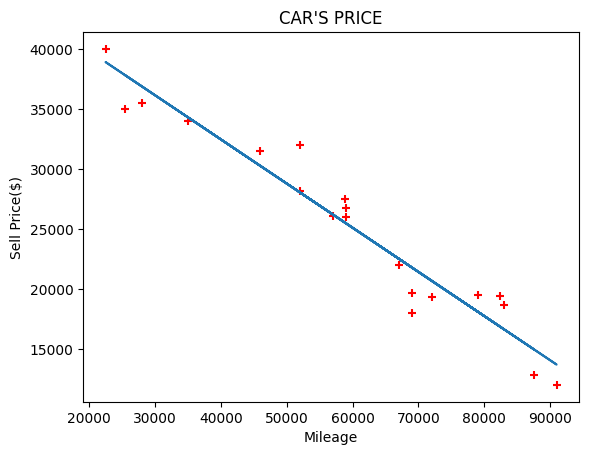

In [82]:
plt.scatter(d_2['Mileage'],d_2['Sell Price($)'],marker='+',color='r')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title("CAR'S PRICE")
a, b = np.polyfit(d_2.Mileage,d_2['Sell Price($)'], 1)
plt.plot(d_2.Mileage, a*d_2.Mileage+b) 

In [83]:
# k_1 = pd.get_dummies(d_2,columns=['Car Model'])
# k_1

In [84]:
# x = k_1.drop(['Car Model_Mercedez Benz C class','Sell Price($)'],axis=1)
# x

In [85]:
# y = k_1['Sell Price($)']
# y

In [86]:
#reg_4 = LinearRegression()

In [87]:
#reg_4.fit(x.values,y.values)

In [88]:
#reg_4.score(x.values,y.values)

In [89]:
#reg_4.predict([[45000,4,0,0]])

In [90]:
#reg_4.predict([[86000,7,0,1]])

In [91]:
#reg_4.score(x.values,y.values)

In [92]:
#reg_4.predict([[69000,6,0,1]])

  #                      Training And Testing Available Data

We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset

In [93]:
df_c = pd.read_csv(r"C:\Users\kotesh\carprices.csv")
df_c.index +=1
df_c

,Mileage,Age(yrs),Sell Price($)
1,69000,6,18000
2,35000,3,34000
3,57000,5,26100
4,22500,2,40000
5,46000,4,31500
6,59000,5,26750
7,52000,5,32000
8,72000,6,19300
9,91000,8,12000
10,67000,6,22000


# Car Mileage Vs Sell Price ($)

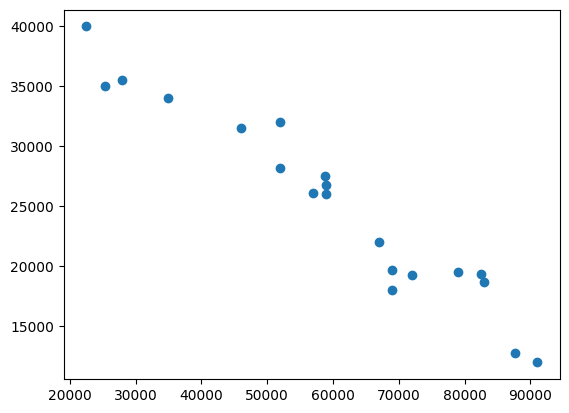

In [94]:
plt.scatter(df_c['Mileage'],df_c['Sell Price($)'])

# Car Age Vs Sell Price ($)

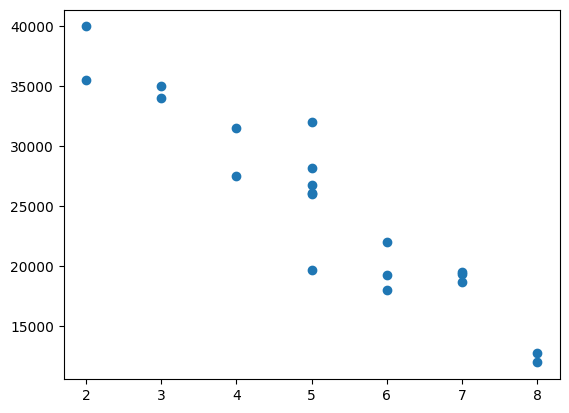

In [95]:
plt.scatter(df_c['Age(yrs)'],df_c['Sell Price($)'])

Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)
    

##### The approach we are going to use here is to split available data in two sets
       Training: We will train our model on this dataset
       Testing: We will use this subset to make actual predictions using trained model

The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [96]:
x = df_c[['Mileage','Age(yrs)']]
x

,Mileage,Age(yrs)
1,69000,6
2,35000,3
3,57000,5
4,22500,2
5,46000,4
6,59000,5
7,52000,5
8,72000,6
9,91000,8
10,67000,6


In [97]:
y = df_c['Sell Price($)']
y

1     18000
2     34000
3     26100
4     40000
5     31500
6     26750
7     32000
8     19300
9     12000
10    22000
11    18700
12    19500
13    26000
14    27500
15    19400
16    35000
17    35500
18    19700
19    12800
20    28200
Name: Sell Price($), dtype: int64

In [98]:
from sklearn.model_selection import train_test_split 

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=(.2),random_state=10)

In [100]:
x_train

,Mileage,Age(yrs)
4,22500,2
19,87600,8
14,58780,4
3,57000,5
15,82450,7
9,91000,8
18,69000,5
17,28000,2
20,52000,5
13,59000,5


In [101]:
x_test

,Mileage,Age(yrs)
8,72000,6
11,83000,7
6,59000,5
7,52000,5


In [102]:
y_train

4     40000
19    12800
14    27500
3     26100
15    19400
9     12000
18    19700
17    35500
20    28200
13    26000
12    19500
2     34000
1     18000
16    35000
5     31500
10    22000
Name: Sell Price($), dtype: int64

In [103]:
y_test

8     19300
11    18700
6     26750
7     32000
Name: Sell Price($), dtype: int64

In [104]:
from sklearn import linear_model as lm

In [105]:
reg_5 = lm.LinearRegression()

In [106]:
 reg_5.fit(x_train.values,y_train.values)

LinearRegression()

In [107]:
reg_5.predict(x_test.values)

array([20474.0745775 , 16352.07892168, 25174.14834912, 27197.42175439])

In [108]:
y_test

8     19300
11    18700
6     26750
7     32000
Name: Sell Price($), dtype: int64

In [109]:
reg_5.score(x_test.values,y_test.values)

0.7332339593090136

# Logistic Regression: Binary Classification

## Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [110]:
df_i = pd.read_csv(r"C:\Users\kotesh\insurance_data.csv")
df_i.index +=1
df_i

,age,bought_insurance
1,22,0
2,25,0
3,47,1
4,52,0
5,46,1
6,56,1
7,55,0
8,60,1
9,62,1
10,61,1


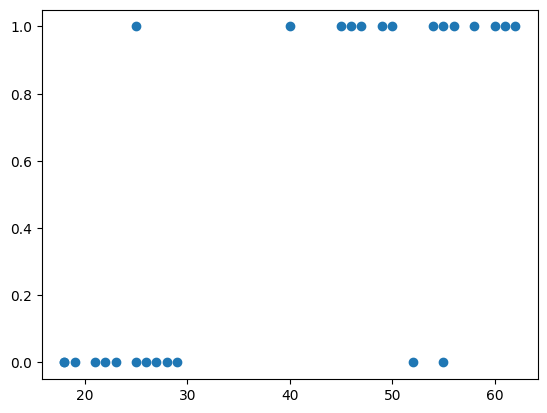

In [111]:
plt.scatter(df_i['age'],df_i['bought_insurance'])

In [112]:
#from sklearn.model_selection import train_test_split

In [113]:
#x_train,x_test,y_train,y_test = train_test_split(df_i['age'],df_i.bought_insurance,test_size=0.1,)

In [114]:
# from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [115]:
#reg_6 = lm.LogisticRegression()

In [116]:
model.fit(df_i[['age']].values,df_i.bought_insurance.values)

LogisticRegression()

In [117]:
model.predict([[60]])

array([1], dtype=int64)

In [118]:
model.score(df_i[['age']].values,df_i.bought_insurance.values)

0.8888888888888888

In [119]:
# model.fit(x_train.values,y_train.values)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Convert the pandas Series into a 2D array
x = df_i['age'].values.reshape(-1, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, df_i.bought_insurance, test_size=0.2)

# Create and fit the model
model = LogisticRegression()

In [121]:
model.fit(x_train, y_train)

LogisticRegression()

In [122]:
print(x_test)
y_pred = model.predict(x_test)
y_pred

[[26]
 [18]
 [55]
 [25]
 [62]
 [55]]


array([0, 0, 1, 0, 1, 1], dtype=int64)

In [123]:
model.score(x_test,y_test)

0.6666666666666666

# Logistic Regression: Multiclass Classification

In [124]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [125]:
import seaborn as sns

In [126]:
df = sns.load_dataset('iris')

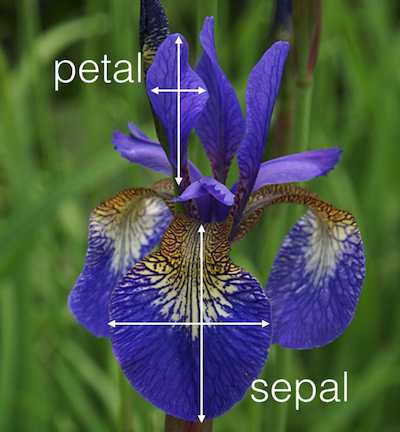

In [127]:
from PIL import Image as img
img_1 = img.open('iris_petal_sepal.png')
img_1

In [128]:
df.index +=1
df

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [129]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [130]:
df['species'] = df['species'].replace({'setosa':1,'versicolor':2,'virginica':3})

In [131]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,3
147,6.3,2.5,5.0,1.9,3
148,6.5,3.0,5.2,2.0,3
149,6.2,3.4,5.4,2.3,3


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test = train_test_split(df[['sepal_length','sepal_width','petal_length','petal_width']],df['species'],test_size=0.1)

In [134]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
72,6.1,2.8,4.0,1.3
36,5.0,3.2,1.2,0.2
63,6.0,2.2,4.0,1.0
13,4.8,3.0,1.4,0.1
81,5.5,2.4,3.8,1.1
...,...,...,...,...
82,5.5,2.4,3.7,1.0
125,6.7,3.3,5.7,2.1
64,6.1,2.9,4.7,1.4
108,7.3,2.9,6.3,1.8


In [135]:
print(x_test)
y_test

     sepal_length  sepal_width  petal_length  petal_width
54            5.5          2.3           4.0          1.3
29            5.2          3.4           1.4          0.2
113           6.8          3.0           5.5          2.1
133           6.4          2.8           5.6          2.2
9             4.4          2.9           1.4          0.2
91            5.5          2.6           4.4          1.2
95            5.6          2.7           4.2          1.3
17            5.4          3.9           1.3          0.4
5             5.0          3.6           1.4          0.2
69            6.2          2.2           4.5          1.5
58            4.9          2.4           3.3          1.0
99            5.1          2.5           3.0          1.1
12            4.8          3.4           1.6          0.2
39            4.4          3.0           1.3          0.2
55            6.5          2.8           4.6          1.5


54     2
29     1
113    3
133    3
9      1
91     2
95     2
17     1
5      1
69     2
58     2
99     2
12     1
39     1
55     2
Name: species, dtype: int64

In [136]:
from sklearn.linear_model import LogisticRegression as LR

In [137]:
model = LR()

In [138]:
model.fit(x_train,y_train)

LogisticRegression()

In [139]:
model.predict(x_test)

array([2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2], dtype=int64)

# Decision_Tree Clasification

In [140]:
df_t = pd.read_csv('salaries.csv')
df_t.index +=1
df_t

,company,job,degree,salary_more_then_100k
1,google,sales executive,bachelors,0
2,google,sales executive,masters,0
3,google,business manager,bachelors,1
4,google,business manager,masters,1
5,google,computer programmer,bachelors,0
6,google,computer programmer,masters,1
7,abc pharma,sales executive,masters,0
8,abc pharma,computer programmer,bachelors,0
9,abc pharma,business manager,bachelors,0
10,abc pharma,business manager,masters,1


In [141]:
x = df_t.drop(['salary_more_then_100k'],axis=1)
y = df_t.salary_more_then_100k

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
x_company = LabelEncoder()
x_job = LabelEncoder()
x_degree = LabelEncoder()

In [144]:
x['company'] = x_company.fit_transform(x['company'])
x['job'] = x_company.fit_transform(x['job'])
x['degree'] = x_company.fit_transform(x['degree'])

In [145]:
x

,company,job,degree
1,2,2,0
2,2,2,1
3,2,0,0
4,2,0,1
5,2,1,0
6,2,1,1
7,0,2,1
8,0,1,0
9,0,0,0
10,0,0,1


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)

In [148]:
x_train

,company,job,degree
8,0,1,0
3,2,0,0
7,0,2,1
11,1,2,0
5,2,1,0
2,2,2,1
15,1,1,0
1,2,2,0
16,1,1,1
10,0,0,1


In [149]:
y_train

8     0
3     1
7     0
11    1
5     0
2     0
15    1
1     0
16    1
10    1
9     0
13    1
12    1
6     1
Name: salary_more_then_100k, dtype: int64

In [150]:
len(x_train)

14

In [151]:
len(y_train)

14

In [152]:
x_test

,company,job,degree
4,2,0,1
14,1,0,1


In [153]:
y_test

4     1
14    1
Name: salary_more_then_100k, dtype: int64

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
model = DecisionTreeClassifier()

In [156]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [157]:
print(y_test)
y_predict = model.predict(x_test.values)
y_predict

4     1
14    1
Name: salary_more_then_100k, dtype: int64


array([1, 1], dtype=int64)

In [158]:
model.score(x_test,y_test)

1.0

# Measure accuracy of our model

In [159]:
model.score(x_test.values,y_test.values)

1.0

In [160]:
model.predict([[2,1,1]])

array([1], dtype=int64)

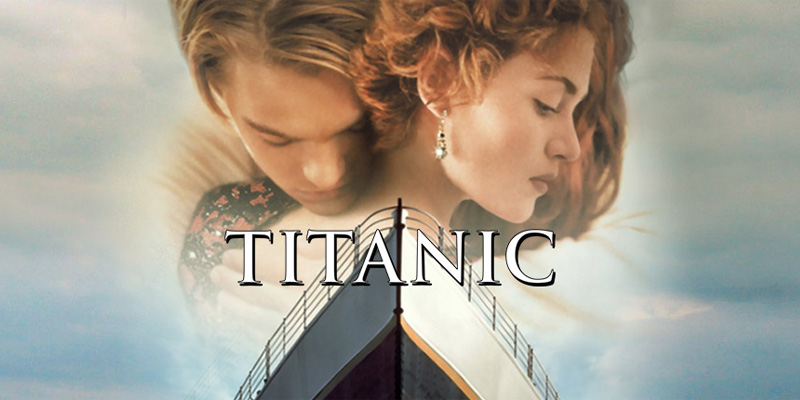

In [161]:
# Example
# image using pillow
from PIL import Image
img = Image.open('titanic.jpg')
img

In [162]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.index +=1
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [163]:
#x = df_titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
# or 
x = df_titanic[['Pclass','Sex','Age','Fare']]
y=df_titanic.Survived
y

1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [164]:
x

,Pclass,Sex,Age,Fare
1,3,male,22.0,7.2500
2,1,female,38.0,71.2833
3,3,female,26.0,7.9250
4,1,female,35.0,53.1000
5,3,male,35.0,8.0500
...,...,...,...,...
887,2,male,27.0,13.0000
888,1,female,19.0,30.0000
889,3,female,NaN,23.4500
890,1,male,26.0,30.0000


In [165]:
# x['Sex'] = x['Sex'].replace({'male':0,'female':1})

x['Sex'] = x['Sex'].map({'male':1,'female':2})

In [166]:
x

,Pclass,Sex,Age,Fare
1,3,1,22.0,7.2500
2,1,2,38.0,71.2833
3,3,2,26.0,7.9250
4,1,2,35.0,53.1000
5,3,1,35.0,8.0500
...,...,...,...,...
887,2,1,27.0,13.0000
888,1,2,19.0,30.0000
889,3,2,NaN,23.4500
890,1,1,26.0,30.0000


In [167]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [168]:
x['Age'] = x.Age.fillna(x.Age.mean())

In [169]:
x

,Pclass,Sex,Age,Fare
1,3,1,22.000000,7.2500
2,1,2,38.000000,71.2833
3,3,2,26.000000,7.9250
4,1,2,35.000000,53.1000
5,3,1,35.000000,8.0500
...,...,...,...,...
887,2,1,27.000000,13.0000
888,1,2,19.000000,30.0000
889,3,2,29.699118,23.4500
890,1,1,26.000000,30.0000


In [170]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

Here there is no null value presrnt in the data set

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05,random_state=1)

In [173]:
len(y_train)
#len(y_test)

846

In [174]:
x_train

,Pclass,Sex,Age,Fare
364,3,1,35.000000,7.0500
60,3,1,11.000000,46.9000
796,2,1,39.000000,13.0000
738,1,1,35.000000,512.3292
842,2,1,16.000000,10.5000
...,...,...,...,...
716,3,1,19.000000,7.6500
768,3,2,30.500000,7.7500
73,2,1,21.000000,73.5000
236,3,2,29.699118,7.5500


In [175]:
y_train

364    0
60     0
796    0
738    1
842    0
      ..
716    0
768    0
73     0
236    0
38     0
Name: Survived, Length: 846, dtype: int64

In [176]:
x_test

,Pclass,Sex,Age,Fare
863,1,2,48.000000,25.9292
224,3,1,29.699118,7.8958
85,2,2,17.000000,10.5000
681,3,2,29.699118,8.1375
536,2,2,7.000000,26.2500
624,3,1,21.000000,7.8542
149,2,1,36.500000,26.0000
4,1,2,35.000000,53.1000
35,1,1,28.000000,82.1708
242,3,2,29.699118,15.5000


In [177]:
y_test

863    1
224    0
85     1
681    0
536    1
624    0
149    0
4      1
35     0
242    1
795    0
3      1
7      0
18     1
369    1
431    1
820    0
744    0
190    0
438    1
383    0
74     0
711    1
386    0
112    0
822    1
743    1
866    1
620    0
709    1
883    0
299    1
611    0
730    0
526    0
234    1
513    1
155    0
371    1
641    0
217    1
9      1
872    1
332    0
828    1
Name: Survived, dtype: int64

In [178]:
from sklearn import tree

In [179]:
model_titanic = tree.DecisionTreeClassifier()

In [180]:
model_titanic.fit(x_train,y_train)

DecisionTreeClassifier()

In [181]:
y_predict = model_titanic.predict(x_test)
y_predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1], dtype=int64)

In [182]:
y_test

863    1
224    0
85     1
681    0
536    1
624    0
149    0
4      1
35     0
242    1
795    0
3      1
7      0
18     1
369    1
431    1
820    0
744    0
190    0
438    1
383    0
74     0
711    1
386    0
112    0
822    1
743    1
866    1
620    0
709    1
883    0
299    1
611    0
730    0
526    0
234    1
513    1
155    0
371    1
641    0
217    1
9      1
872    1
332    0
828    1
Name: Survived, dtype: int64

# Measure accuracy of our model

In [183]:
model_titanic.score(x_test,y_test)

0.8444444444444444

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[21,  1],
       [ 6, 17]], dtype=int64)

# Support Vector Machine (SVM)

In [186]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [187]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [188]:
df.to_csv('iris.csv')

In [189]:
# Split the data into features and labels
y = df['species']
x = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [190]:
# Split the data into features and labels
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [191]:
# Create an SVM model and train it
model = SVC()

In [192]:
model.fit(x_train,y_train)

SVC()

In [193]:
model.predict(x_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [194]:
y_test

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
134     virginica
51     versicolor
73     versicolor
54     versicolor
63     versicolor
37         setosa
78     versicolor
90     versicolor
45         setosa
16         setosa
121     virginica
66     versicolor
24         setosa
8          setosa
126     virginica
22         setosa
44         setosa
97     versicolor
93     versicolor
26         setosa
Name: species, dtype: object

In [195]:
# Evaluate the model on the test data
y_predict = model.score(x_test,y_test)
print('Test Model Accurcy:-',y_predict)

Test Model Accurcy:- 1.0


# Random Forest

Randomm forest is constructed using multiple desion trees and final decision is obtained by majority votes of the decision tree

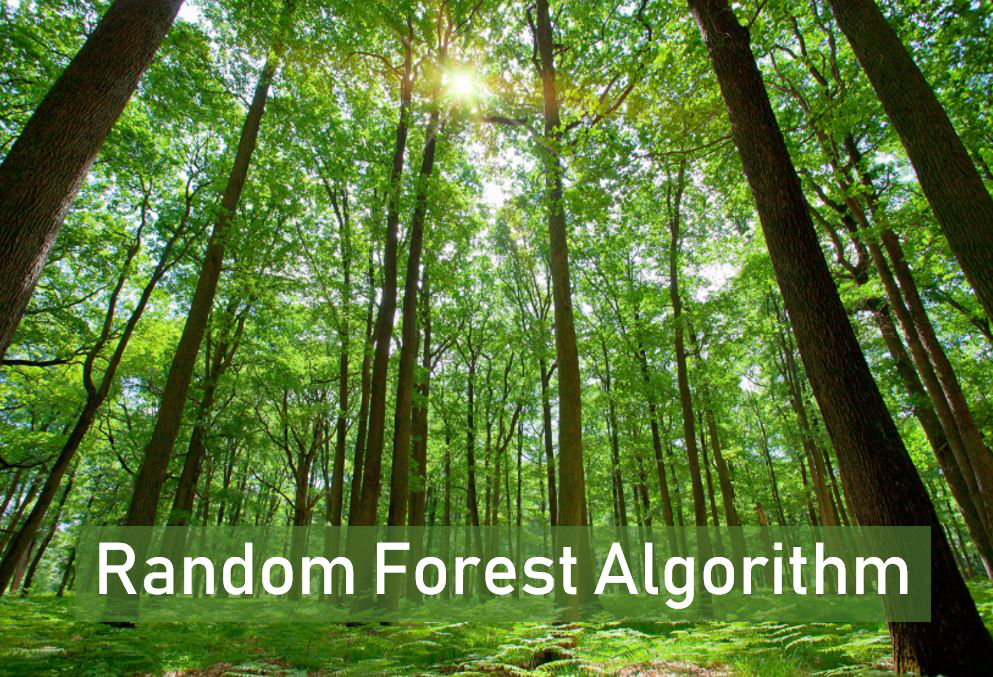

In [196]:
from PIL import Image
img_1 = Image.open('forest.jpg')
img_1

In [197]:
type(img_1)

PIL.JpegImagePlugin.JpegImageFile

In [198]:
from sklearn.datasets import load_iris
iris = load_iris()

In [199]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [200]:
df = pd.DataFrame(iris.data,columns=['A','B','C','D'])
df['target'] = iris.target
df.index +=1
df

,A,B,C,D,target
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [201]:
x_train,x_test,y_train,y_test = train_test_split(df[['A','B','C','D']].values,df.target.values,test_size=0.1,random_state=1)

In [202]:
x_train.shape

(135, 4)

In [203]:
x_test.shape

(15, 4)

In [204]:
from sklearn.ensemble import RandomForestClassifier as RF

In [205]:
model = RF(n_estimators=50)

In [206]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [207]:
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

In [208]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

In [209]:
model.score(x_test,y_test)

1.0

In [210]:
from sklearn.metrics import confusion_matrix as CM

In [211]:
cm = CM(y_test,y_predict)
cm

array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 4]], dtype=int64)

<Axes: >

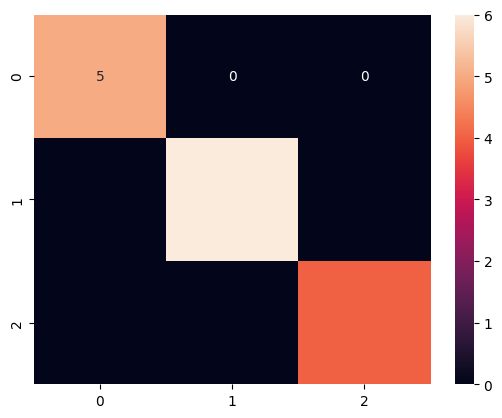

In [212]:
sns.heatmap(cm,annot=True)

#  Cross_Validation_Score Function

In [213]:
from sklearn.datasets import load_iris

In [214]:
iris = load_iris()

In [215]:
from sklearn.model_selection import cross_val_score 

### Logistic regression model performance using cross_val_score

In [216]:
kfold_l = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),iris.data,iris.target,cv=4)

In [217]:
kfold_l

array([1.        , 0.94736842, 0.86486486, 1.        ])

In [218]:
np.average(kfold_l)

0.9530583214793741

### random forest performance using cross_val_score

In [219]:
kfold_f = cross_val_score(RF(n_estimators=50),iris.data,iris.target,cv=4)

In [220]:
kfold_f

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

In [221]:
np.average(kfold_f)

0.9667496443812233

### svm model performance using cross_val_score

In [222]:
kfold_s = cross_val_score(SVC(gamma='auto'),iris.data,iris.target,cv=4)

In [223]:
kfold_s

array([0.97368421, 1.        , 0.94594595, 0.97297297])

In [224]:
np.average(kfold_s)

0.9731507823613088

In [225]:
#Example
df_t = pd.read_csv('titanic.csv')
df_t.index+=1
df_t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [226]:
df_t['Sex'] = df_t['Sex'].map({'male':1,'female':2 })

In [227]:
titanic = df_t[['Pclass','Sex','Age','Fare']]
Survived_titanic = df_t.Survived

In [228]:
titanic.fillna(titanic.Sex.mean(),inplace=True)

In [229]:
titanic.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [230]:
Survived_titanic.isnull().sum()

0

### Logistic regression model performance using cross_val_score

In [231]:
from sklearn.model_selection import cross_val_score

In [232]:
cvs_tl = cross_val_score(LogisticRegression(),titanic.values,Survived_titanic.values,cv=3)

In [233]:
cvs_tl

array([0.79124579, 0.77777778, 0.76767677])

In [234]:
np.average(cvs_tl)

0.7789001122334455

## svm model performance using cross_val_score

In [235]:
cvs_ts = cross_val_score(SVC(gamma='auto'),titanic,Survived_titanic,cv=3)

In [236]:
cvs_ts

array([0.67003367, 0.67003367, 0.68350168])

In [237]:
np.average(cvs_ts)

0.6745230078563411

## Random forest performance using cross_val_score

In [238]:
cvs_tf = cross_val_score(RF(n_estimators=40),titanic,Survived_titanic,cv=3)

In [239]:
cvs_tf

array([0.76430976, 0.82154882, 0.80808081])

In [240]:
np.average(cvs_tf)

0.797979797979798

## Desicion tree performance using cross_val_score

In [241]:
cvs_tt = cross_val_score(DecisionTreeClassifier(),titanic,Survived_titanic,cv=3)

In [242]:
cvs_tt

array([0.75420875, 0.79124579, 0.76430976])

In [243]:
np.average(cvs_tt)

0.7699214365881032

## Linearregression performance using cross_val_score

In [244]:
cvs_tlr = cross_val_score(LinearRegression(),titanic,Survived_titanic,cv=3)

In [245]:
cvs_tlr

array([0.30975449, 0.38153689, 0.37239159])

In [246]:
np.average(cvs_tlr)

0.35456098989254387

# Clustering With K Means

In [247]:
#pip install --upgrade threadpoolctl

In [248]:
#pip install --upgrade scikit-learn

In [249]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [250]:
df_income = pd.read_csv('income.csv')
df_income.index+=1
df_income

,Name,Age,Income($)
1,Rob,27,70000
2,Michael,29,90000
3,Mohan,29,61000
4,Ismail,28,60000
5,Kory,42,150000
6,Gautam,39,155000
7,David,41,160000
8,Andrea,38,162000
9,Brad,36,156000
10,Angelina,35,130000


Text(0.5, 1.0, 'Income scatter plot')

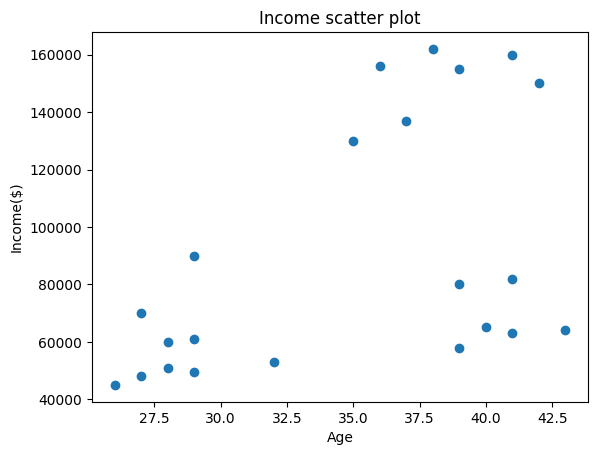

In [251]:
plt.scatter(df_income.Age,df_income['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Income scatter plot')

In [252]:
km = KMeans(n_clusters=3)
km.fit_predict(df_income[['Age','Income($)']])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

### Elbow Plot

In [253]:
sum_of_squared_error = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_income[['Age', 'Income($)']])
    sum_of_squared_error.append(km.inertia_)

In [254]:
sum_of_squared_error

[39748148458.545456,
 3318233941.1619053,
 1577046058.8831167,
 814746044.2545456,
 296500418.0952381,
 239333671.33333334,
 174800337.70000002,
 119633613.78333335,
 92633459.70000002]

Text(6, 1.0, 'K value(elbow point)')

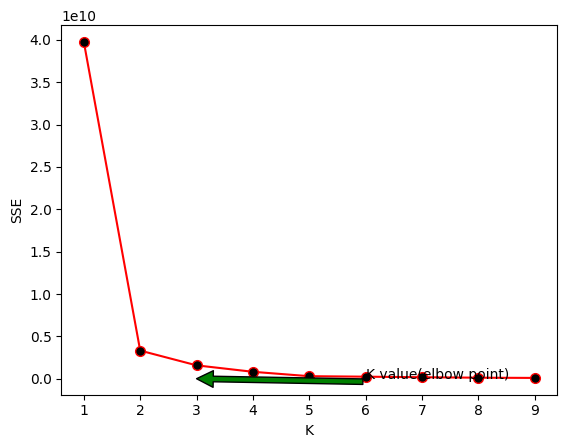

In [255]:
plt.plot(k_range,sum_of_squared_error,color='red',marker='o',markerfacecolor='k',markersize=7)
plt.xlabel('K')
plt.ylabel('SSE')
plt.annotate('K value(elbow point)',xy=(3,1),xytext=(6,1.0), arrowprops=dict(facecolor='g'))

In [256]:
df_income = df_income.drop(['Name'],axis=1)

In [257]:
df_income

,Age,Income($)
1,27,70000
2,29,90000
3,29,61000
4,28,60000
5,42,150000
6,39,155000
7,41,160000
8,38,162000
9,36,156000
10,35,130000


In [258]:
from sklearn.cluster import KMeans

In [259]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_income[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [260]:
df_income['cluster'] = y_predicted
df_income

,Age,Income($),cluster
1,27,70000,2
2,29,90000,2
3,29,61000,0
4,28,60000,0
5,42,150000,1
6,39,155000,1
7,41,160000,1
8,38,162000,1
9,36,156000,1
10,35,130000,1


In [261]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

Text(0.5, 1.0, 'Income scatter plot')

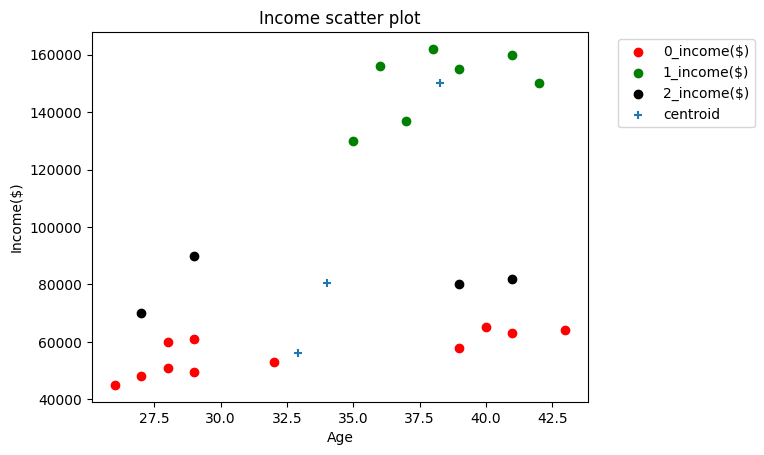

In [262]:
df_0 = df_income[df_income.cluster==0]
df_1 = df_income[df_income.cluster==1]
df_2 = df_income[df_income.cluster==2]
plt.scatter(df_0.Age,df_0['Income($)'],color='red',label='0_income($)')
plt.scatter(df_1.Age,df_1['Income($)'],color='green',label='1_income($)')
plt.scatter(df_2.Age,df_2['Income($)'],color='k',label='2_income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',label='centroid')
plt.legend(loc=0,bbox_to_anchor=(1,0.1,.35,.9))
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Income scatter plot')

In [263]:
df_income

,Age,Income($),cluster
1,27,70000,2
2,29,90000,2
3,29,61000,0
4,28,60000,0
5,42,150000,1
6,39,155000,1
7,41,160000,1
8,38,162000,1
9,36,156000,1
10,35,130000,1


In [264]:
df_income = df_income.drop(['cluster'],axis=1)

### Preprocessing using min max scaler

In [265]:
df_income = pd.read_csv('income.csv')
df_income.index+=1
df_income = df_income.drop(['Name'],axis=1)
df_income

,Age,Income($)
1,27,70000
2,29,90000
3,29,61000
4,28,60000
5,42,150000
6,39,155000
7,41,160000
8,38,162000
9,36,156000
10,35,130000


In [266]:
scale = MinMaxScaler()
scale.fit(df_income[['Age']])
df_income['Age'] = scale.transform(df_income[['Age']])

scale.fit(df_income[['Income($)']])
df_income['Income($)'] = scale.transform(df_income[['Income($)']])
                        

In [267]:
df_income

,Age,Income($)
1,0.058824,0.213675
2,0.176471,0.384615
3,0.176471,0.136752
4,0.117647,0.128205
5,0.941176,0.897436
6,0.764706,0.940171
7,0.882353,0.982906
8,0.705882,1.000000
9,0.588235,0.948718
10,0.529412,0.726496


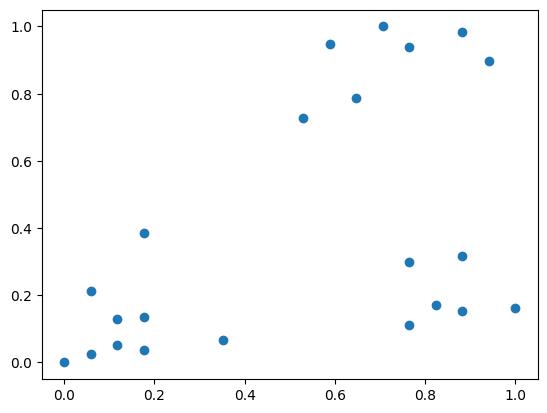

In [268]:
plt.scatter(df_income['Age'],df_income['Income($)'])

In [269]:
sum_of_squared_error = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_income[['Age', 'Income($)']])
    sum_of_squared_error.append(km.inertia_)

Text(6, 1.0, 'K value(elbow point)')

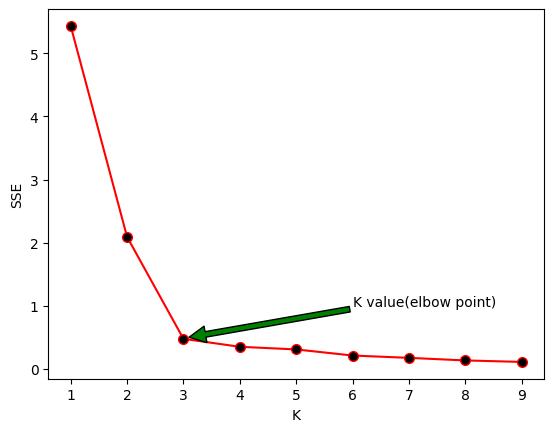

In [270]:
plt.plot(k_range,sum_of_squared_error,color='red',marker='o',markerfacecolor='k',markersize=7)
plt.xlabel('K')
plt.ylabel('SSE')
plt.annotate('K value(elbow point)',xy=(3.1,.5),xytext=(6,1.0), arrowprops=dict(facecolor='g'))

In [271]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y = km.fit_predict(df_income[['Age','Income($)']])

In [272]:
y

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [273]:
df_income['cluster_1'] = y

In [274]:
df_income

,Age,Income($),cluster_1
1,0.058824,0.213675,2
2,0.176471,0.384615,2
3,0.176471,0.136752,2
4,0.117647,0.128205,2
5,0.941176,0.897436,0
6,0.764706,0.940171,0
7,0.882353,0.982906,0
8,0.705882,1.000000,0
9,0.588235,0.948718,0
10,0.529412,0.726496,0


In [275]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

Text(0.5, 1.0, 'Income scatter plot')

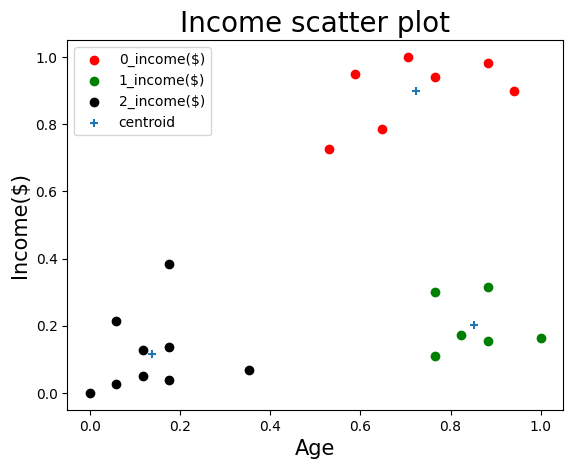

In [276]:
df_0 = df_income[df_income.cluster_1==0]
df_1 = df_income[df_income.cluster_1==1]
df_2 = df_income[df_income.cluster_1==2]
plt.scatter(df_0.Age,df_0['Income($)'],color='red',label='0_income($)')
plt.scatter(df_1.Age,df_1['Income($)'],color='green',label='1_income($)')
plt.scatter(df_2.Age,df_2['Income($)'],color='k',label='2_income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',label='centroid')
plt.legend(loc=0)#bbox_to_anchor=(1,0.1,.35,.9))
plt.xlabel('Age',size=15)
plt.ylabel('Income($)',size=15)
plt.title('Income scatter plot',size=20)

In [277]:
# Example 
from sklearn.datasets import load_iris

In [278]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [279]:
df = pd.DataFrame(iris.data,columns=['length','wibth','C','D'])

In [280]:
df = df.drop(['C','D'],axis=1)
df

,length,wibth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


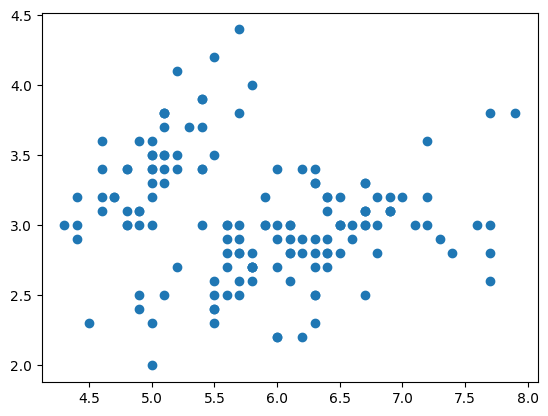

In [281]:
plt.scatter(df.length,df.wibth)

In [282]:
sse = []
k_rrg = range(1,10)
for k in k_rrg:
    km = KMeans(n_clusters=k)
    km.fit(df[['length','wibth']])
    sse.append(km.inertia_)

In [283]:
sse

[130.47526666666667,
 58.20409278906672,
 37.05070212765958,
 28.024426573426584,
 21.02435270289721,
 17.39520434799936,
 14.854361471861473,
 12.831428960473083,
 11.182722397015505]

Text(5.5, 70, 'K value(elbow point)')

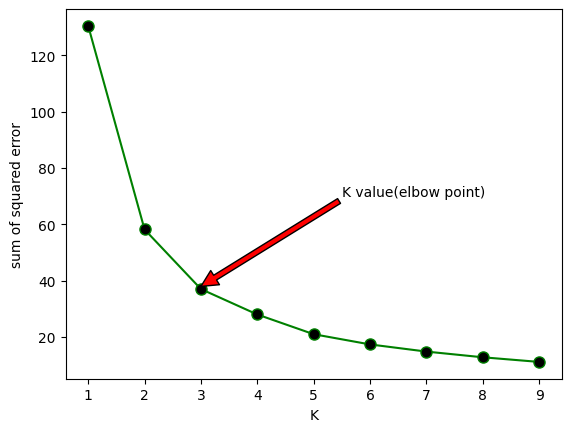

In [284]:
plt.plot(k_rrg,sse,color='g',marker='o',markerfacecolor='k',markersize='8')
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.annotate('K value(elbow point)',xy=(3,38),xytext=(5.5,70),arrowprops=dict(facecolor='r'))

In [285]:
scale = MinMaxScaler()
length_2d = df['length'].values.reshape(-1,1)
scale.fit(length_2d)
df['length'] = scale.transform(length_2d)

wibth_2d = df['wibth'].values.reshape(-1,1)
scale.fit(wibth_2d)
df['wibth'] = scale.transform(wibth_2d)

In [286]:
df

,length,wibth
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667
...,...,...
145,0.666667,0.416667
146,0.555556,0.208333
147,0.611111,0.416667
148,0.527778,0.583333


In [287]:
km = KMeans(n_clusters=3)
predict = km.fit_predict(df)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [288]:
df['cluster'] = predict
df

,length,wibth,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,0
147,0.611111,0.416667,2
148,0.527778,0.583333,2


In [289]:
km.cluster_centers_

array([[0.40483539, 0.28009259],
       [0.19897959, 0.60459184],
       [0.69562648, 0.45390071]])

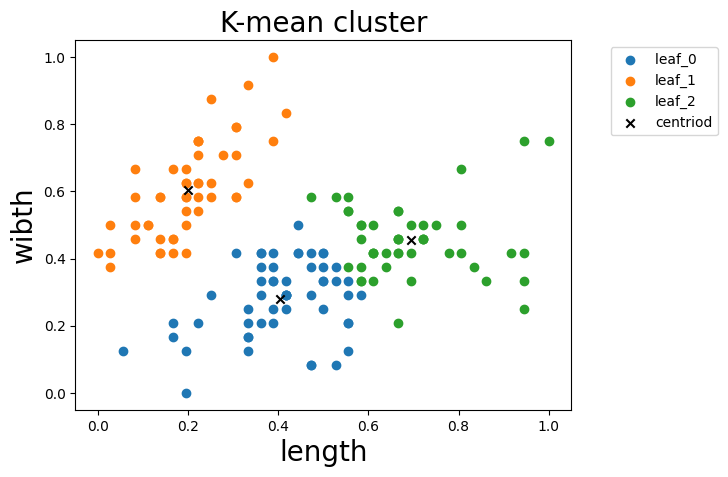

In [290]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.length,df0.wibth,label='leaf_0 ')
plt.scatter(df1.length,df1.wibth,label='leaf_1')
plt.scatter(df2.length,df2.wibth,label='leaf_2')
#https://matplotlib.org/3.3.0/api/markers_api.html
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',label='centriod',color='k')
plt.xlabel('length',size=20)
plt.ylabel('wibth',size=20)
plt.title('K-mean cluster',size=20)
plt.legend(loc=0,bbox_to_anchor=(1,0.1,.31,.9))

# Naive Bayes 

In [291]:
df_n = pd.read_csv('titanic.csv')
df_n.index+=1
df_n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [292]:
df_n.columns[:]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [293]:
df_n1 = df_n[['Pclass', 'Sex', 'Age','Fare']]
round((df_n1.isnull().sum()/df_n1.shape[0])*100,2)

Pclass     0.00
Sex        0.00
Age       19.87
Fare       0.00
dtype: float64

In [294]:
df_n1.Age.fillna(df_n1.Age.mean(),inplace=True)

In [295]:
df_n1.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [296]:
df_n1['Sex'] = df_n1.Sex.map({ 'male':1,'female':2})
df_n1

,Pclass,Sex,Age,Fare
1,3,1,22.000000,7.2500
2,1,2,38.000000,71.2833
3,3,2,26.000000,7.9250
4,1,2,35.000000,53.1000
5,3,1,35.000000,8.0500
...,...,...,...,...
887,2,1,27.000000,13.0000
888,1,2,19.000000,30.0000
889,3,2,29.699118,23.4500
890,1,1,26.000000,30.0000


In [297]:
df_n2 = df_n['Survived']
df_n2.isnull().sum()

0

In [298]:
df_n1

,Pclass,Sex,Age,Fare
1,3,1,22.000000,7.2500
2,1,2,38.000000,71.2833
3,3,2,26.000000,7.9250
4,1,2,35.000000,53.1000
5,3,1,35.000000,8.0500
...,...,...,...,...
887,2,1,27.000000,13.0000
888,1,2,19.000000,30.0000
889,3,2,29.699118,23.4500
890,1,1,26.000000,30.0000


In [299]:
from sklearn.model_selection import train_test_split

In [300]:
x_train,x_test,y_train,y_test = train_test_split(df_n1,df_n2,test_size=.05)

In [301]:
from sklearn.naive_bayes import GaussianNB

In [302]:
model = GaussianNB()

In [303]:
model.fit(x_train,y_train)

GaussianNB()

In [304]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [305]:
y_train

284    1
495    0
344    0
717    1
522    0
      ..
641    0
208    1
207    0
459    1
600    1
Name: Survived, Length: 846, dtype: int64

In [306]:
model.score(x_test,y_test)

0.7333333333333333

# Email📧 Detection

In [307]:
df_email = pd.read_csv('spam.csv')
df_email.index+=1
df_email

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [308]:
df_email.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [309]:
df_spam = df_email.Category.map({'ham':1,'spam':2})
df_spam

1       1
2       1
3       2
4       1
5       1
       ..
5568    2
5569    1
5570    1
5571    1
5572    1
Name: Category, Length: 5572, dtype: int64

In [310]:
df_email

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [311]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [312]:
df_em = cv.fit_transform(df_email['Message'])

In [313]:
x_train,x_test,y_train,y_test = train_test_split(df_em,df_spam,test_size=0.1)

In [314]:
x_train

<5014x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 66809 stored elements in Compressed Sparse Row format>

In [315]:
y_train

5250    1
4159    1
4904    2
4295    1
4924    1
       ..
2564    1
3221    1
3064    1
4418    1
836     1
Name: Category, Length: 5014, dtype: int64

In [316]:
y_train.shape

(5014,)

In [317]:
# v = CountVectorizer()
# x_train_v = v.fit_transform(x_train.values)
# #x_train_v.toarray()[:2]

In [318]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [319]:
model.fit(x_train,y_train)

MultinomialNB()

In [320]:
model.score(x_train,y_train)

0.9932189868368568

In [321]:
model.score(x_test,y_test)

0.9713261648745519

# or 

In [322]:
df_email

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [323]:
x_train,x_test,y_train,y_test = train_test_split(df_email.Message,df_email.Category,test_size=.1,random_state=2)

In [324]:
print(x_test)
y_test

5087    Omg if its not one thing its another. My cat h...
2121                I hope you know I'm still mad at you.
2319    Waqt se pehle or naseeb se zyada kisi ko kuch ...
2918      What time should I tell my friend to be around?
1353                       Yo theres no class tmrw right?
                              ...                        
3434    Camera - You are awarded a SiPix Digital Camer...
2053    Hey darlin.. i can pick u up at college if u t...
375     I cant keep talking to people if am not sure i...
1901                          I love working from home :)
4580    Urgent! call 09066350750 from your landline. Y...
Name: Message, Length: 558, dtype: object


5087     ham
2121     ham
2319     ham
2918     ham
1353     ham
        ... 
3434    spam
2053     ham
375      ham
1901     ham
4580    spam
Name: Category, Length: 558, dtype: object

In [325]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']

# sklearn pipeline

In [326]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [327]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [328]:
clf.score(x_test,y_test)

0.974910394265233

In [329]:
clf.score(x_train,y_train)

0.994415636218588

In [330]:
clf.predict(emails)

array(['ham', 'spam'], dtype='<U4')

In [331]:
# example
from sklearn.datasets import load_wine

In [332]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [333]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [334]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

In [335]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [336]:
df = pd.DataFrame(wine.data,columns=(wine.feature_names))
df.index+=1
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
175,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
176,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
177,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [337]:
df_1 = df['target'] = wine.target

In [338]:
df_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [339]:
df_2=df.copy()
df_2['target'] = wine.target
df_2['target'] = df_2['target'].apply (lambda x: wine.target_names[x])
df_2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
175,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
176,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
177,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [340]:
from sklearn.model_selection import cross_val_score

In [341]:
kc = cross_val_score(GaussianNB(),df,df_1,cv=3)
kc

array([1., 1., 1.])

In [342]:
kc_1 = cross_val_score(MultinomialNB(),df,df_1,cv=3)
kc_1

array([0.78333333, 0.81355932, 0.96610169])

In [343]:
x_train,x_test,y_train,y_test = train_test_split(df,df_1,test_size=0.1,random_state=0)

In [344]:
from sklearn.naive_bayes import GaussianNB
gm = GaussianNB()

In [345]:
gm.fit(x_train,y_train)

GaussianNB()

In [346]:
gm.predict(x_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0])

In [347]:
print(y_test)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0]


In [348]:
gm.score(x_test,y_test)

1.0

In [349]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()

In [350]:
mb.fit(x_train,y_train)

MultinomialNB()

In [351]:
x_test.shape

(18, 14)

In [352]:
x_train.shape

(160, 14)

In [353]:
y_test.shape

(18,)

In [354]:
y_train.shape

(160,)

In [355]:
mb.predict(x_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0])

In [356]:
y_test

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0])

In [357]:
mb.score(x_test,y_test)

1.0

# GridSearchCV

In [358]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=(iris.feature_names))
df.index+=1
df['target'] = iris.target
df_1 = df.copy()
df_1['target'] =  df['target'].apply(lambda x: iris.target_names[x])
df_1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [359]:
x = df.drop(['target'],axis=1)
y = df.target

In [360]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=0)

In [361]:
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# cross_val_score

In [362]:
clf = cross_val_score(MultinomialNB(alpha=1.0),x,y,cv=4)
clf

array([1.        , 0.97368421, 0.89189189, 1.        ])

In [363]:
clf_1 = cross_val_score(MultinomialNB(),x,y,cv=4)
clf_1

array([1.        , 0.97368421, 0.89189189, 1.        ])

In [364]:
clf_2 = cross_val_score(BernoulliNB(alpha=1.0),x,y,cv=4)
clf_2

array([0.31578947, 0.31578947, 0.32432432, 0.32432432])

In [365]:
clf_2 = cross_val_score(BernoulliNB(),x,y,cv=4)
clf_2

array([0.31578947, 0.31578947, 0.32432432, 0.32432432])

In [366]:
clf_3 = cross_val_score(GaussianNB(),x,y,cv=4)
clf_3

array([0.94736842, 0.94736842, 0.91891892, 1.        ])

In [367]:
cl = GridSearchCV(MultinomialNB(),{'alpha':[0,1]},cv=4,return_train_score=False)
cl.fit(x,y)

GridSearchCV(cv=4, estimator=MultinomialNB(), param_grid={'alpha': [0, 1]})

In [368]:
df = pd.DataFrame(cl.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004390,0.003471,0.002350,0.002417,0,{'alpha': 0},1.0,0.947368,0.918919,1.0,0.966572,0.034909,1
1,0.003466,0.003068,0.002564,0.002798,1,{'alpha': 1},1.0,0.973684,0.891892,1.0,0.966394,0.044335,2


In [369]:
cl.best_params_

{'alpha': 0}

In [370]:
cl.best_score_

0.9665718349928876

In [371]:
clf_4 = GridSearchCV(SVC(gamma='auto'),{'C':[1,5,10,20],'kernel':['rbf','linear','poly']},cv=5,return_train_score=False)
clf_4.fit(x,y)
print(clf_4.best_params_)
print(clf_4.best_score_)

{'C': 1, 'kernel': 'rbf'}
0.9800000000000001


In [372]:
df = pd.DataFrame(clf_4.cv_results_)
df.index+=1
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.005074,0.003847,0.004498,0.001986,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.004131,0.002508,0.001243,0.001171,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.003746,0.003399,0.005518,0.002971,1,poly,"{'C': 1, 'kernel': 'poly'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,8
4,0.004810,0.003275,0.001893,0.001716,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
5,0.003323,0.001858,0.003924,0.004341,5,linear,"{'C': 5, 'kernel': 'linear'}",1.000000,1.000000,0.933333,0.966667,1.0,0.980000,0.026667,1
6,0.006364,0.003531,0.002673,0.002309,5,poly,"{'C': 5, 'kernel': 'poly'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,8
7,0.002348,0.002240,0.003254,0.002332,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
8,0.004960,0.004205,0.001756,0.003512,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,6
9,0.007305,0.004972,0.003217,0.003144,10,poly,"{'C': 10, 'kernel': 'poly'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,8
10,0.003757,0.003813,0.002651,0.003481,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.966667,1.0,0.966667,0.036515,7


In [373]:
df[['param_C','param_kernel','params','mean_test_score']]

,param_C,param_kernel,params,mean_test_score
1,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.980000
2,1,linear,"{'C': 1, 'kernel': 'linear'}",0.980000
3,1,poly,"{'C': 1, 'kernel': 'poly'}",0.966667
4,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.980000
5,5,linear,"{'C': 5, 'kernel': 'linear'}",0.980000
6,5,poly,"{'C': 5, 'kernel': 'poly'}",0.966667
7,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.980000
8,10,linear,"{'C': 10, 'kernel': 'linear'}",0.973333
9,10,poly,"{'C': 10, 'kernel': 'poly'}",0.966667
10,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667


# RandomizedSearchCV

In [374]:
from sklearn.model_selection import RandomizedSearchCV
sv = RandomizedSearchCV(SVC(gamma='auto'),{'C':[1,5,10,20],'kernel':['rbf','linear','poly']},cv=5,
                        return_train_score=False,n_iter=3)
sv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=3,
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['rbf', 'linear', 'poly']})

In [375]:
print(sv.best_params_)
print(sv.best_score_)

{'kernel': 'linear', 'C': 5}
0.9800000000000001


In [376]:
pd.DataFrame(sv.cv_results_)[['param_C','param_kernel','params','mean_test_score']]

,param_C,param_kernel,params,mean_test_score
0,5,linear,"{'kernel': 'linear', 'C': 5}",0.98
1,10,rbf,"{'kernel': 'rbf', 'C': 10}",0.98
2,1,rbf,"{'kernel': 'rbf', 'C': 1}",0.98


# Hyper Parameters
the process of chossing optiminal(best for given data set) parameters is called hyper parameters

# Finding best model for iris dataset

In [377]:
sample = {
    'support_vector_model':{
        'model':SVC(gamma='auto'),
        'params':{'C':[1,5,10,20],'kernel':['rbf','linear','poly']}    
            },
    'random_forest':{
        'model':RandomForestClassifier(),
    'params':{'n_estimators':[5,10,20,30]}
            },
    'Logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
         'params':{'C':[1,5,10,20] }
        },
    'naive_bayes_multi':{
        'model': MultinomialNB(),
        'params':{ 'alpha':[1.0,2.0,5]      }
    },
    'GaussianNB':{
        'model': GaussianNB(),
        'params':{},
    }
}

In [378]:
#score = []
for model_name,mp in sample.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
#     score.append({
    print('model_name :-', model_name),
    print('best_score :-',clf.best_score_),
    print('best_params :-',clf.best_params_,'\n'),
  #  })

model_name :- support_vector_model
best_score :- 0.9800000000000001
best_params :- {'C': 1, 'kernel': 'rbf'} 

model_name :- random_forest
best_score :- 0.96
best_params :- {'n_estimators': 5} 

model_name :- Logistic_regression
best_score :- 0.9666666666666668
best_params :- {'C': 5} 

model_name :- naive_bayes_multi
best_score :- 0.9600000000000002
best_params :- {'alpha': 2.0} 

model_name :- GaussianNB
best_score :- 0.9533333333333334
best_params :- {} 



# or

In [379]:
score = []
for model_name,mp in sample.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    score.append({
    'model_name': model_name,
    'best_score' : clf.best_score_,
    'best_params':clf.best_params_
   })

In [380]:
score

[{'model_name': 'support_vector_model',
  'best_score': 0.9800000000000001,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model_name': 'random_forest',
  'best_score': 0.9600000000000002,
  'best_params': {'n_estimators': 5}},
 {'model_name': 'Logistic_regression',
  'best_score': 0.9666666666666668,
  'best_params': {'C': 5}},
 {'model_name': 'naive_bayes_multi',
  'best_score': 0.9600000000000002,
  'best_params': {'alpha': 2.0}},
 {'model_name': 'GaussianNB',
  'best_score': 0.9533333333333334,
  'best_params': {}}]

In [381]:
df = pd.DataFrame(score)
df.index+=1
df

,model_name,best_score,best_params
1,support_vector_model,0.980000,"{'C': 1, 'kernel': 'rbf'}"
2,random_forest,0.960000,{'n_estimators': 5}
3,Logistic_regression,0.966667,{'C': 5}
4,naive_bayes_multi,0.960000,{'alpha': 2.0}
5,GaussianNB,0.953333,{}


here the best score is support_vector_model then we use svm for isris dataset